In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

import seaborn as sns


In [ ]:
# import
data_for_model = pd.read_csv('/content/sample_data_pca.csv')

# Drop unnecessary columns and shuffle data

data_for_model.drop(columns=['user_id'], inplace = True)
data_for_model = shuffle(data_for_model,random_state = 42)
data_for_model.head()

,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0045,0.0,0.2887,0.0,0.0000,0.0000,0.0000,0.0136,0.0000
42,1,0.0278,0.0,0.0000,0.0000,0.0,0.0036,0.0002,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.1894,0.0000,0.0000,0.0000
256,1,0.0000,0.0,0.0367,0.0053,0.0,0.0000,0.0367,0.0,0.0,...,0.0000,0.0002,0.0,0.0002,0.0,0.0001,0.0000,0.0243,0.0000,0.0005
182,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0011,0.8431,0.0000,0.0000,0.0000
56,1,0.0007,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0011,0.0163,0.0,0.0000,0.0,0.0000,0.0000,0.0179,0.8111,0.0000


In [ ]:
data_for_model['purchased_album'].value_counts(normalize = True)*100

,proportion
purchased_album,
1,53.370787
0,46.629213


In [ ]:
# dealing with missing values

data_for_model.isna().sum()

,0
purchased_album,0
artist1,0
artist2,0
artist3,0
artist4,0
...,...
artist96,0
artist97,0
artist98,0
artist99,0


In [ ]:
X = data_for_model.drop(columns=['purchased_album'])
y = data_for_model['purchased_album']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scale_standard = StandardScaler()
X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.transform(X_test)

In [ ]:
## Apply PCA

pca = PCA(n_components = None, random_state = 42)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

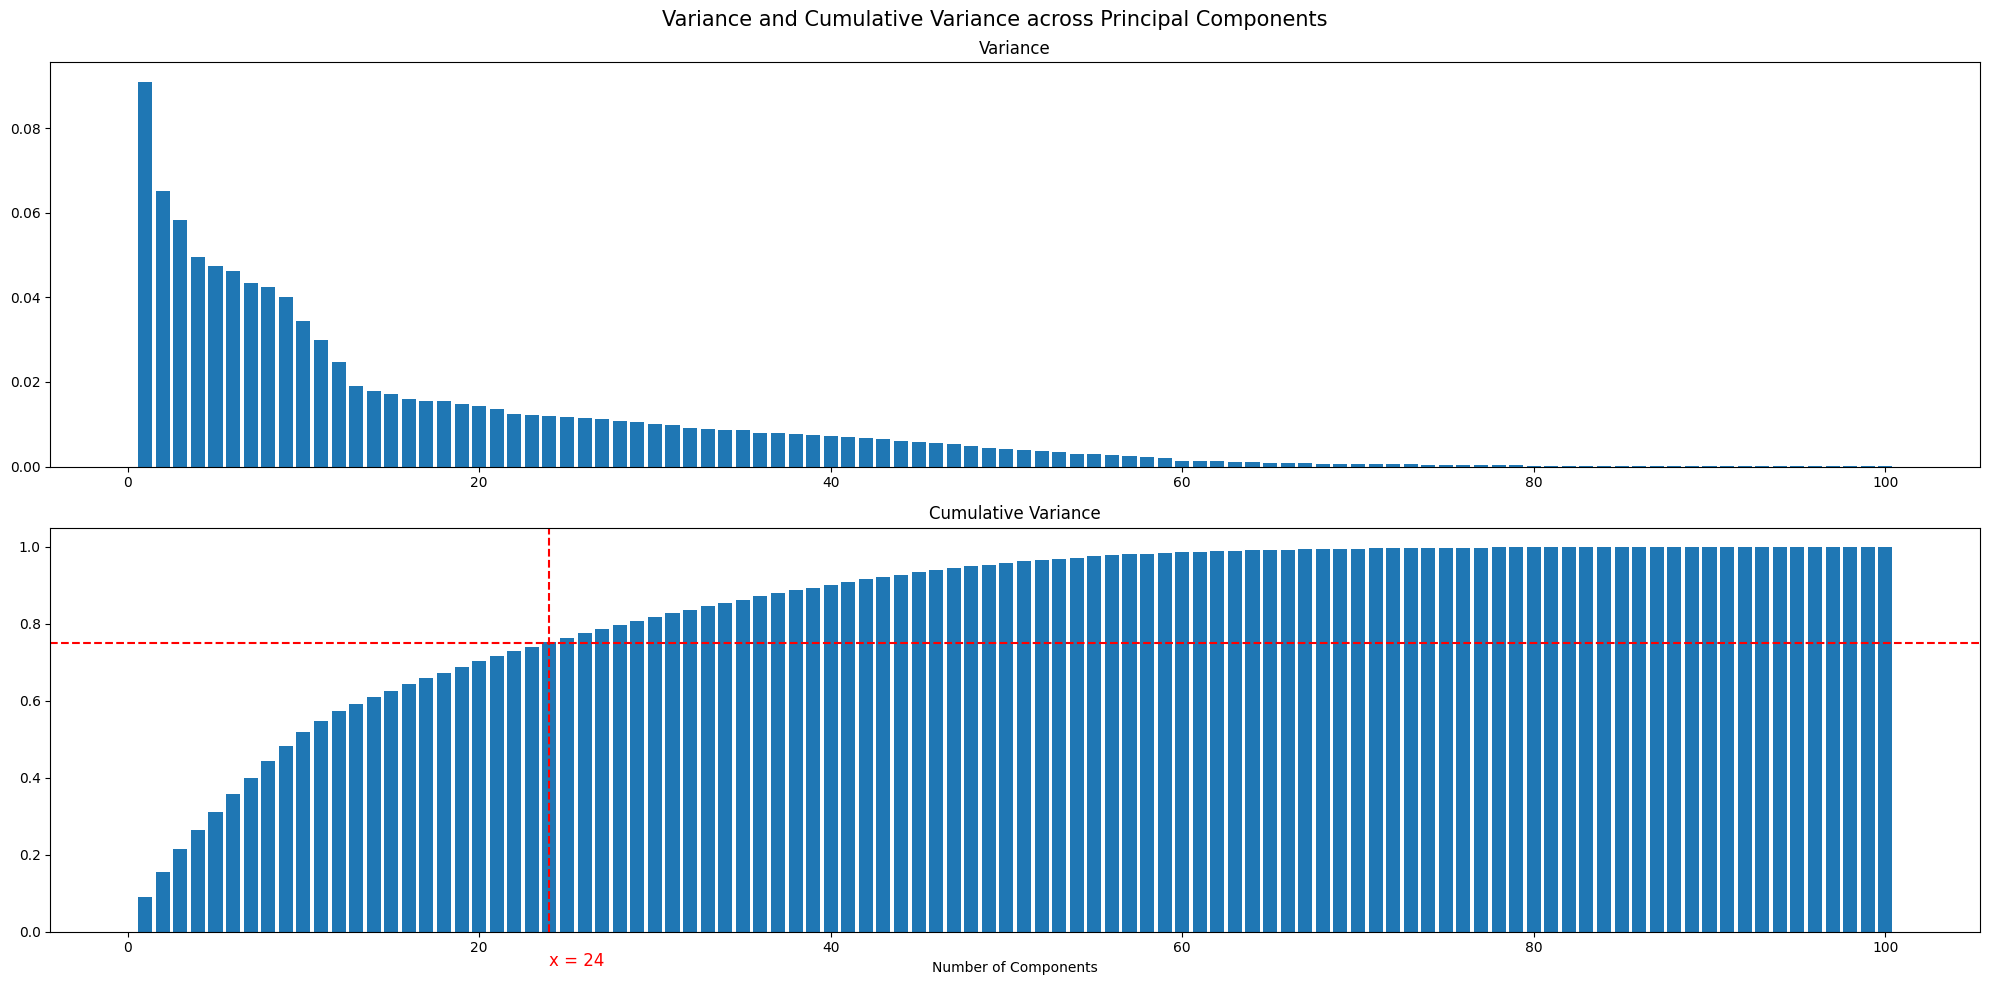

In [ ]:
## charting variance and cumulative variance

fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].bar(list(range(1,len(explained_variance) + 1)),explained_variance)
ax[0].set_title('Variance')
ax[1].bar(list(range(1,len(explained_variance_cumulative) + 1)),explained_variance_cumulative)
ax[1].set_title('Cumulative Variance')
ax[1].set_xlabel('Number of Components')
ax[1].axhline(y = 0.75, color = 'r', linestyle = '--')
ax[1].axvline(x = 24, color = 'r', linestyle = '--')
ax[1].text(24, -0.1, 'x = 24', color='r', fontsize=12, verticalalignment='bottom')
fig.suptitle('Variance and Cumulative Variance across Principal Components',fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
## Apply PCA with Selected Number of Components

pca = PCA(n_components = 0.75, random_state = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.n_components_

## 75% variance explained by 24 components

24

In [ ]:
## Fit a Random Forest Classifier on the PCA data

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

In [ ]:
## Assess model accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9444444444444444
